# Neural Networks from Scratch

In [47]:
#Setup
#Let’s begin by preparing our environment and seeding the random number generator properly:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import math

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 6





In [48]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


## Sigmoid activations (and Sigmoid derivative)

The sigmoid function takes a function of weights multiplied by input values (plus some bias) and converts the sum of these numbers to results between zero and one.  We will also use its derivative for backpropagation.

The sigmoid function is used quite commonly in the realm of deep learning, at least it was until recently. It has distinct S shape and it is a differentiable real function for any real input value. Additionally, it has a positive derivative at each point. More importantly, we will use it as an activation function for the hidden layer of our model. Here’s how it is defined:

It’s first derivative (which we will use during the backpropagation step of our training algorithm) has the following formula:

![sigmoid](https://cdn-images-1.medium.com/max/800/1*-PkQzu0E21YEbI9wvqvQzg.png)


So, the derivative can be expressed using the original sigmoid function. 

![sigmoid prime](https://cdn-images-1.medium.com/max/800/1*yT0ToBoL4o9eTgph6BWx4Q.png)


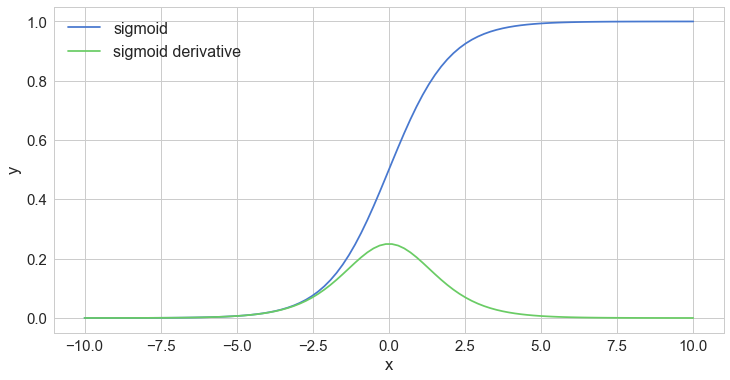

In [49]:

x = np.linspace(-10., 10., num=100)

#create sigmoid fxn

def sigmoid (x): return 1/(1 + np.exp(-x))      # activation function
def sigmoid_prime(x): return sigmoid(x) * (1 - sigmoid(x))             # derivative of sigmoid

sig = sigmoid(x)


sig_prime = sigmoid_prime(x)

plt.plot(x, sig, label="sigmoid")
plt.plot(x, sig_prime, label="sigmoid derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 16})
plt.show()

# Build a simple X and y dataset

In [50]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])

print(X)
print(X.shape)
print(Y)
print(Y.shape)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
(4L, 2L)
[[0]
 [1]
 [1]
 [0]]
(4L, 1L)


# Set parameters for Network

### Examples of parameters
**epochs:** the number of iterations we run to minimize error and update weights and biases during backpropagation

**inputLayerSize:** The number of features in X

**hiddenLayerSize:** How many hidden neurons will be in our hidden layer

**outputLayerSize:** The length of our output layer.  For regression problems it is one.  For binary categorization it is one (a predicted probability between zero and one). And for larger categories its the number of categories you will predict.
        
Other typical parameters-

learning rate: .01 or .001 typically.  Used to multiply by gradient adjustments to weights and biases in backpropagation
                    Will slow down the learning process.
                    
number of hidden layers:  We can have more than one hidden layer.  Typically we experiment with two or three to find the best predictive model.

In [51]:
# Set parameters for example network
epochs = 60000 # Number of iterations

inputLayerSize =2 # Number of X features
hiddenLayerSize = 3 # One neuron in single hidden layer
outputLayerSize = 1 # Single neuron in output layer

In [52]:
# We'll create a super simple model that doesn't even include biases

# Initialize random weights

Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))
 


In [53]:
# We use matrix multiplication to multiply these weights by input X values first
# Then we take the result and multiply that by the sigmoid function
H = sigmoid(np.dot(X, Wh)) 

Z = sigmoid(np.dot(H, Wz))                  # output layer results from random initial weights

E = Y - Z                                   # how much we missed (error) 

print(E) # print error

[[-0.682]
 [ 0.304]
 [ 0.256]
 [-0.754]]


In [54]:
dZ = E * sigmoid_prime(Z)                        # delta Z, gradient adjustments to Wz. (Could shrink by multiplying by learning rate)
print(dZ)                       

[[-0.152]
 [ 0.067]
 [ 0.056]
 [-0.164]]


In [55]:
dH = dZ.dot(Wz.T) * sigmoid_prime(H)             # delta H (Notice we are working backwards step by step)
print(dH)

[[-0.002 -0.031 -0.021]
 [ 0.001  0.014  0.009]
 [ 0.001  0.011  0.008]
 [-0.002 -0.031 -0.022]]


In [56]:
Wz +=  H.T.dot(dZ)                          # update output layer weights 
Wh +=  X.T.dot(dH)                          # update hidden layer weights

#X.T() means we are transposing X before doing matrix multiplication

In [58]:
# Now let's iterate through a bunch of backpropagation steps to update weights

for i in range(epochs):
 
    H = sigmoid(np.dot(X, Wh))                  # hidden layer results
    Z = sigmoid(np.dot(H, Wz))                  # output layer results
    E = Y - Z                                   # how much we missed (error)
    dZ = E * sigmoid_prime(Z)                        # delta Z
    dH = dZ.dot(Wz.T) * sigmoid_prime(H)             # delta H
    Wz +=  H.T.dot(dZ)                          # update output layer weights
    Wh +=  X.T.dot(dH)                          # update hidden layer weights

print(np.around(Z,3))                # Resulting training prediction for each value of Y 

[[0.   ]
 [0.999]
 [0.999]
 [0.001]]


### In a typical version of a network we would add a bias to our weights as well.  But that's pretty much it.  